# Load Libraries

In [172]:
#Default instruction for intellisense use in code
%config IPCompleter.greedy=True

#Verify installation of packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import IPython as ip
import sklearn as skl
import keras as ker
# optional
import theano as th
import tensorflow as tf
import seaborn as sbn

print('Numpy:', np.__version__)
print('Pandas:', pd.__version__)
print('Scipy:', sp.__version__)
print('Matplotlib:', mpl.__version__)
print('iPython:', ip.__version__)
print('Scikit-learn:', skl.__version__)
print('Keras: ', ker.__version__)
print('Theano: ', th.__version__)
print('Tensorflow: ', tf.__version__)

Numpy: 1.14.3
Pandas: 0.23.0
Scipy: 1.1.0
Matplotlib: 2.2.2
iPython: 6.4.0
Scikit-learn: 0.19.1
Keras:  2.2.4
Theano:  1.0.3
Tensorflow:  1.11.0


# Import Data

In [173]:
from import_data import load_data, preprocess_data, preprocess_labels

library = "./"
train_file = "training_data.csv"

train_data_path = library + "/" + train_file

df_train = pd.read_csv(train_data_path)

print("Dataframe Train shape: " + str(df_train.shape))

df_train.head(4)

Dataframe Train shape: (27000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,200000.0,1,2,2,27,0,0,0,0,0,...,183180.0,192223.0,189681.0,7000.0,8100.0,6600.0,12000.0,0.0,6054.0,1
1,160000.0,1,5,2,46,0,0,0,0,-2,...,0.0,0.0,0.0,4318.0,4000.0,0.0,0.0,0.0,73175.0,0
2,130000.0,2,1,2,27,1,-2,-1,0,0,...,29426.0,29100.0,-1410.0,326.0,32100.0,0.0,0.0,0.0,0.0,1
3,70000.0,1,2,2,26,0,0,0,0,0,...,60540.0,26890.0,18923.0,3000.0,4000.0,2000.0,4030.0,0.0,1000.0,0


## Dataset description

There are 25 variables:

1. **ID**: ID of each client 
2. **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. **SEX**: Gender (1=male, 2=female)
4. **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
6. **AGE**: Age in years
7. **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
8. **PAY_2**: Repayment status in August, 2005 (scale same as above)
9. **PAY_3**: Repayment status in July, 2005 (scale same as above)
10. **PAY_4**: Repayment status in June, 2005 (scale same as above)
11. **PAY_5**: Repayment status in May, 2005 (scale same as above)
12. **PAY_6**: Repayment status in April, 2005 (scale same as above)
13. **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
14. **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
15. **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
16. **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
17. **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
18. **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
19. **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
20. **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
21. **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
22. **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
23. **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
24. **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
25. **default.payment.next.month**: Default payment (1=yes, 0=no)

In [174]:
#Summarize how many money need to pay totally for period
df_train['DUE_1']=df_train['BILL_AMT1']-df_train['PAY_AMT1']
df_train['DUE_2']=df_train['BILL_AMT2']-df_train['PAY_AMT2']
df_train['DUE_3']=df_train['BILL_AMT3']-df_train['PAY_AMT3']
df_train['DUE_4']=df_train['BILL_AMT4']-df_train['PAY_AMT4']
df_train['DUE_5']=df_train['BILL_AMT5']-df_train['PAY_AMT5']
df_train['DUE_6']=df_train['BILL_AMT6']-df_train['PAY_AMT6']

df_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,DUE_1,DUE_2,DUE_3,DUE_4,DUE_5,DUE_6
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,2.700000e+04,27000.000000,27000.000000,27000.000000
mean,167649.247407,1.602444,1.854185,1.551630,35.490778,-0.013778,-0.131333,-0.162593,-0.217148,-0.264741,...,4830.773222,4789.847000,5225.453111,0.222074,45664.612963,4.326513e+04,4.199215e+04,38482.572741,35613.602667,33675.685296
std,129646.456604,0.489402,0.790020,0.521831,9.201953,1.126255,1.196936,1.197956,1.170932,1.134785,...,15718.072917,15037.984935,17851.558621,0.415648,73029.813415,7.265265e+04,6.952489e+04,64160.326334,60504.629782,60086.304896
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.000000,-413122.000000,-684896.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,300.000000,248.000000,117.750000,0.000000,750.000000,3.182500e+02,2.767500e+02,211.750000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1500.000000,0.000000,18584.500000,1.806350e+04,1.775850e+04,17023.000000,15577.500000,13960.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4018.250000,4055.000000,4000.000000,0.000000,62441.250000,5.947650e+04,5.655950e+04,50446.000000,47011.750000,46117.250000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,621000.000000,388071.000000,528666.000000,1.000000,726314.000000,7.236290e+05,1.542258e+06,691864.000000,805167.000000,679638.000000


# Heatmat Correlation Matrix

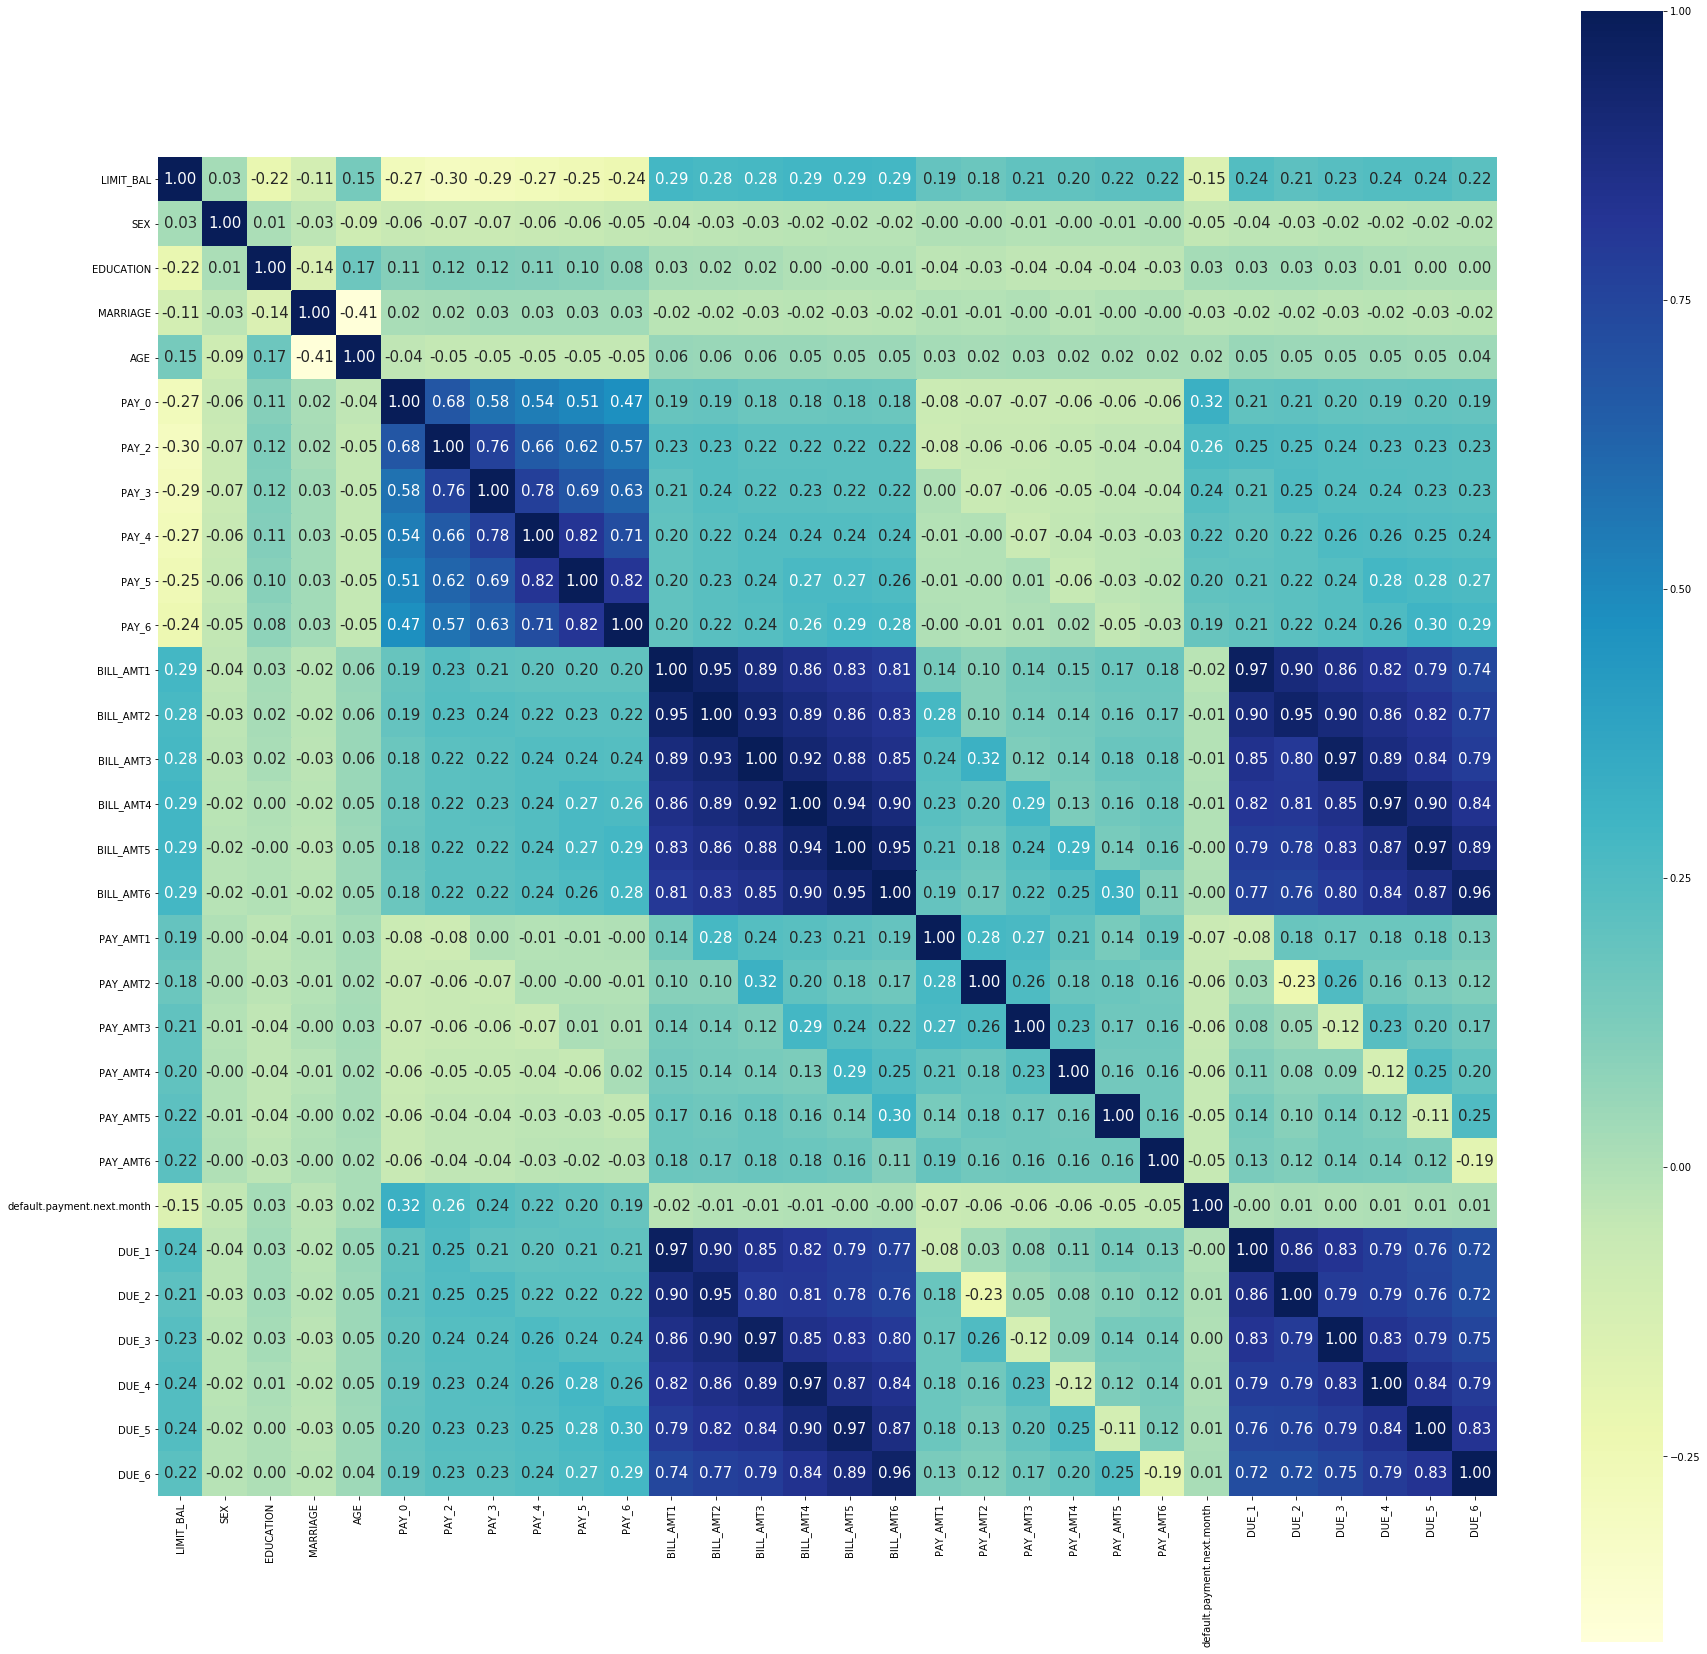

In [175]:
corr=df_train.corr()
corr = (corr)
mpl.pyplot.figure(figsize=(30,30))
sbn.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap="YlGnBu",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Possiamo dedurre che**:  
Le varibili con più alta correlazione rispetto al rischio di default di ogni persona sono quelle relative a PAY, ovvero alla possibilità di ripagare i debiti.  
Interessante notare che per la nostra serie di dati, PAY_0 ha una correlazione più alta rispetto al rischio di default e quindi potrebbe essere un indicatore più importante che influenza la possibilità di andare in default.  
Ovviamente abbiamo una correlazione tra i vari valori di PAY con i valori di BILL.  
Inoltre c'è una correlazione anche tra il LIMIT_BALL e BILL poichè il credito solitamente si basa sulla capacità finanziaria e quindi il credito viene assegnato in base alla disponibilità economica delle persone all'anno.  
  
Questi comportamenti sono ancor più evidenti riassumendo le variabili PAY e BILL 


In [176]:
df_train[['PAY_0', 'default.payment.next.month']].groupby(['PAY_0'], as_index = False).mean()

,PAY_0,default.payment.next.month
0,-2,0.135552
1,-1,0.168002
2,0,0.127834
3,1,0.343410
4,2,0.692626
5,3,0.748252
6,4,0.676056
7,5,0.500000
8,6,0.500000
9,7,0.777778


Possiamo notare che PAY_0, che rappresenta la variabile con correlazione più alta rispetto alle altre e come detto precedentemente potrebbe influenzare molto la possibilità di andare in default.  
Inoltre è chiaro come il ripagamento del debito sul primo periodo non sia molto frequente, ma la maggior parte delle persone sceglie di posticipare anche a lungo distanza il ripagamento

       PAY_0     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
-2  0.135552  0.186852  0.187962  0.195624  0.199951  0.202052
-1  0.168002  0.158521  0.154811  0.158018  0.161930  0.170770
 0  0.127834  0.159211  0.174667  0.183635  0.188524  0.188267
 1  0.343410  0.148148  0.000000  0.000000       NaN       NaN
 2  0.692626  0.560102  0.518625  0.525341  0.547306  0.509230
 3  0.748252  0.608108  0.574766  0.609756  0.630573  0.654971
 4  0.676056  0.494505  0.582090  0.666667  0.615385  0.658537
 5  0.500000  0.619048  0.550000  0.515152  0.600000  0.545455
 6  0.500000  0.727273  0.590909  0.500000  0.666667  0.722222
 7  0.777778  0.578947  0.840000  0.818182  0.821429  0.822222
 8  0.555556       NaN  0.500000  0.500000  1.000000  1.000000


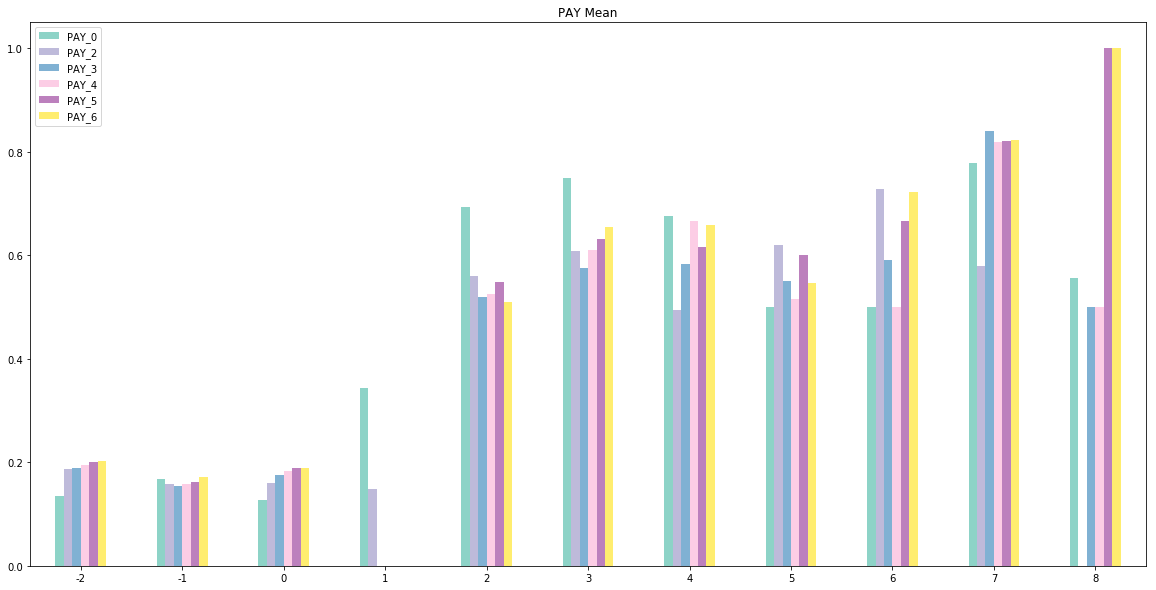

In [177]:
# Function to get default payment means 
def get_pay_mean(PAY_NUM):
    temp = df_train[[PAY_NUM, 'default.payment.next.month']].groupby([PAY_NUM], as_index = True).mean()
    pay_mean = temp['default.payment.next.month']
    return pay_mean

pay_means = {}
for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    pay_means[i] = get_pay_mean(i)
pay_means_results = pd.DataFrame(pay_means)
print(pay_means_results)

pay_means_results.plot(kind = 'bar', title = 'PAY Mean', figsize=(20, 10), legend=True, rot = 0, colormap = 'Set3')


Facendo l'analisi su tutti i vari periodi di ripagamento del debito, rispetto al rischio di default, possiamo evidenziare che il pattern è abbastanza comune, ovvero i pagamenti del debito al mese corrente sono sempre molto pochi e costanti nel tempo rispetto a chi posticipa il pagamento.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


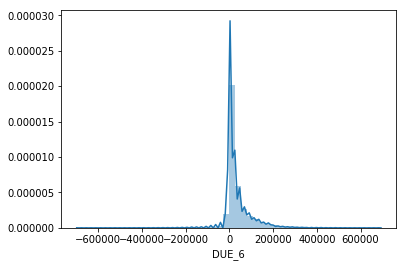

In [178]:
sbn.distplot(df_train['DUE_6'])

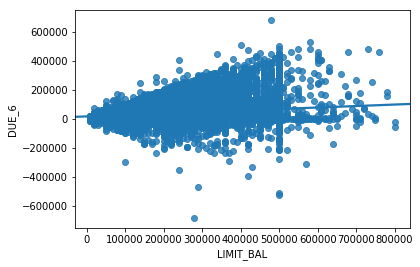

In [179]:
sbn.regplot(x='LIMIT_BAL',y='DUE_6',data=df_train)

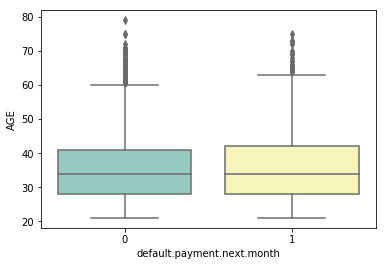

In [180]:
#Rapporto età, rischio di default
sbn.boxplot(x='default.payment.next.month',y='AGE',data=df_train,palette='Set3')

Importante evidenziare come le persone sopra ai 60 anni sono considerati dei bias rispetto ai dati, invece le persone tra i 30 e 40 sono quelle che contraggono più debiti.

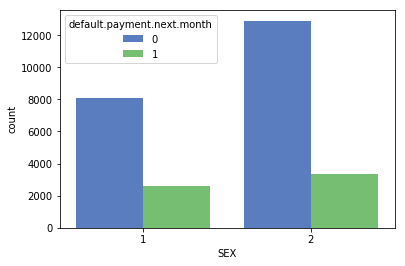

In [181]:
#Rapporto sesso rispetto al default del mese successivo
sbn.countplot(x="SEX", data=df_train,hue="default.payment.next.month", palette="muted")

La probabilità di andare in default è più alta nelle donne rispetto agli uomini, e le donne hanno anche un più alto numero di debiti rispetto agli uomini

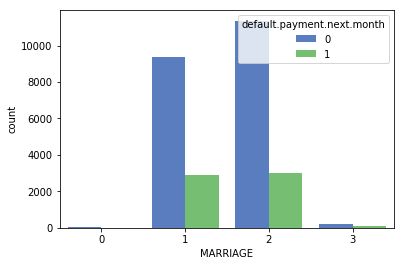

In [182]:
#Rapporto singole-sposati rispetto al default del mese successivo
sbn.countplot(x="MARRIAGE", data=df_train,hue="default.payment.next.month", palette="muted")

Chi è single, contrae più debiti rispetto a chi è sposato, e il tasso di default è simile tra spostati e single, anche se il tasso di ripagamento è più alto per i singole rispetto alle coppie sposate.

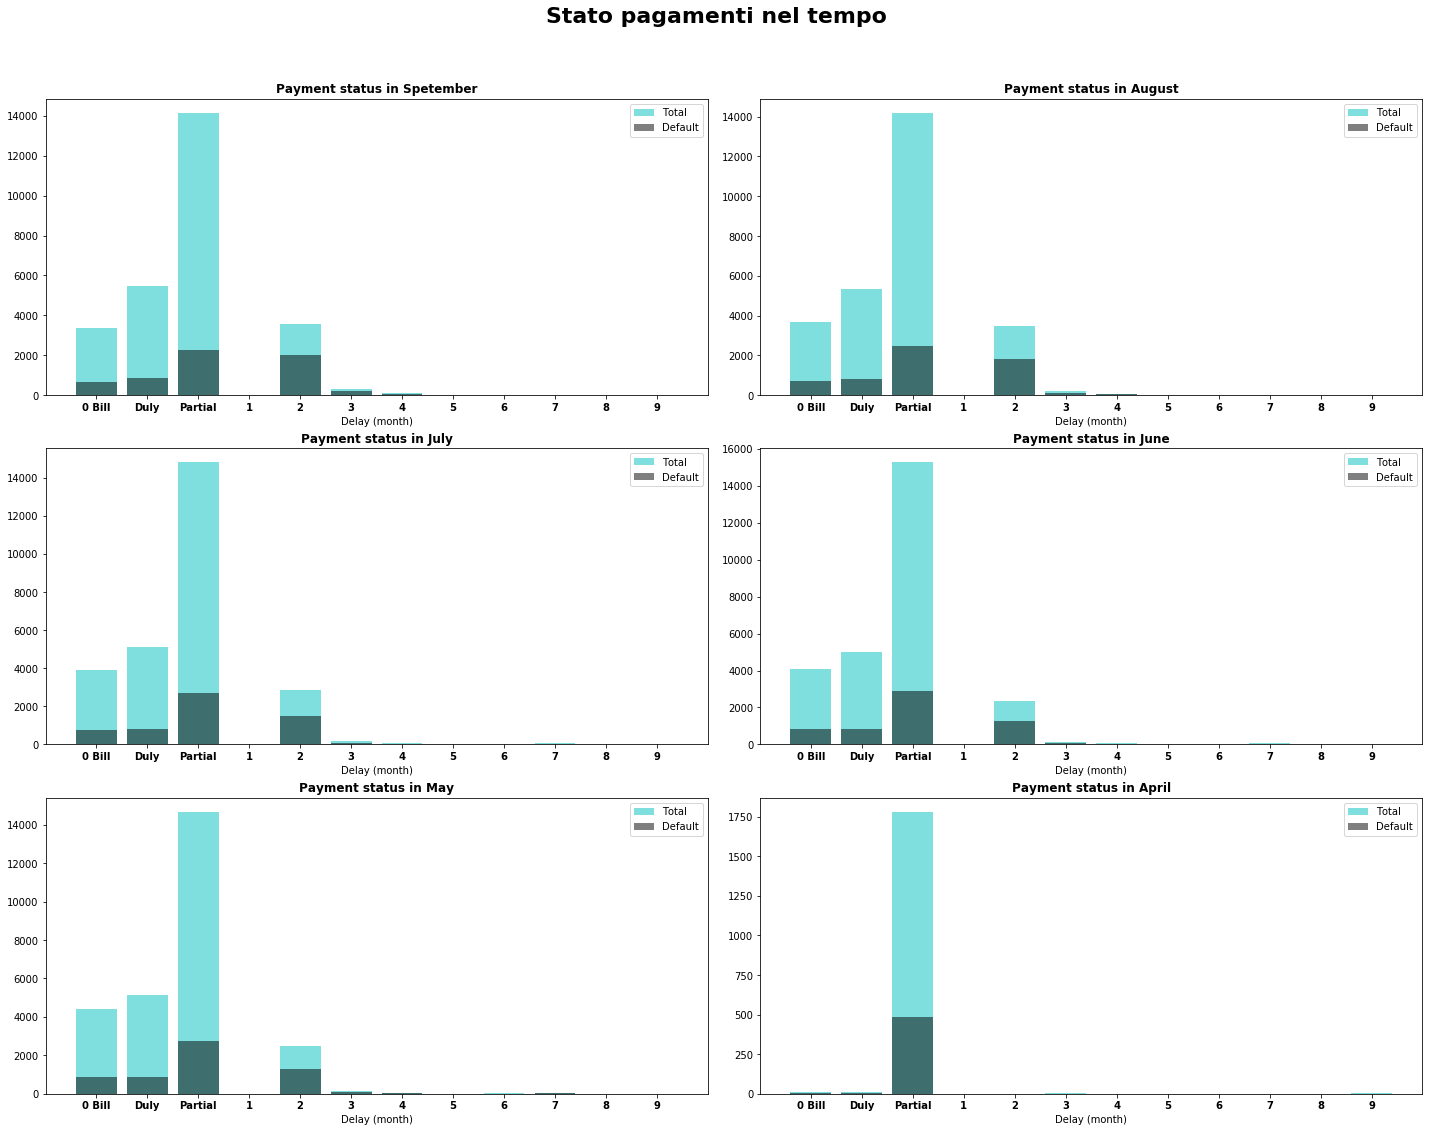

In [183]:
# Payment status (Feature name :'PAY_' )
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

features = list(df_train)
plt.figure(figsize=(20,16))

gs = gridspec.GridSpec(3,2)
i = 0

plt.suptitle('Stato pagamenti nel tempo',fontweight="bold", fontsize=22)
for cn in features[6:12]:
    ax = plt.subplot(gs[i])
    delay = np.zeros(12)
    delay_default = np.zeros(12)  
    for j in np.arange(0,12):
            delay[j] = df_train[cn][df_train[cn]==j-2].count()
            delay_default[j] = df_train[cn][(df_train[cn]==j-2)&(df_train['default.payment.next.month']==1)].count()  

    month = [-2,-1,0,1,2,3,4,5,6,7,8,9]
    plt.bar(month,delay, color='c',alpha=0.5, label='Total')
    plt.bar(month,delay_default, color='k',alpha=0.5, label='Default')

    plt.xticks([-2,-1,0,1,2,3,4,5,6,7,8,9],['0 Bill','Duly','Partial','1','2','3','4','5','6','7','8','9'], fontweight="bold", size=10)
    ax.set_xlabel('Delay (month)')
    months = ['Spetember','August','July','June','May','April']
    ax.set_title('Payment status in ' + months[i], fontweight="bold", size=12)
    ax.legend()
    i+=1
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# Preprocessing dei dati prima della predizione

In [184]:
from keras import models
from keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

#use only usefull features and the label
df_train['MARRIAGE'].replace(0, 3, inplace = True)
df_train['EDUCATION'].replace([0, 5, 6], 4, inplace = True)


#Get only the variable that we need (prefilter)
trainingset = df_train.iloc[:,0:24]
trainingset.shape

#Names of all of the features
features = trainingset.columns.values


# Calculating default Ratio
non_default = len(df_train[df_train['default.payment.next.month']==0])
default = len(df_train[df_train['default.payment.next.month']==1])
ratio = float(default/(non_default+default))
ratio_non_default = float(non_default/(default+non_default))
print('Default Ratio :',ratio)
print('Not Default Ratio : ', ratio_non_default)




#################################################################################à

# Create scaler
scaler = preprocessing.StandardScaler()

predictors = trainingset.drop(['default.payment.next.month'], axis=1).as_matrix()
target = to_categorical(trainingset['default.payment.next.month'])

# Transform the feature
predictors = scaler.fit_transform(predictors)

print("================================")
# Print mean and standard deviation
# Important that mean are null and std are 1.0
print('Mean:', round(predictors[:,0].mean()))
print('Standard deviation:', predictors[:,0].std())
print(predictors)
print(target)

# inputX = X_train.as_matrix()
# inputY = y_train.as_matrix()
# inputX_valid = X_test.as_matrix()[:split]
# inputY_valid = y_test.as_matrix()[:split]
# inputX_test = X_test.as_matrix()[split:]
# inputY_test = y_test.as_matrix()[split:]

Default Ratio : 0.22207407407407406
Not Default Ratio :  0.7779259259259259
Mean: -0.0
Standard deviation: 0.9999999999999999
[[ 0.24953518 -1.23100435  0.21031322 ...  0.45612204 -0.31852244
   0.046414  ]
 [-0.05900191 -1.23100435  2.89706836 ... -0.30734446 -0.31852244
   3.80643543]
 [-0.29040473  0.81234481 -1.13306435 ... -0.30734446 -0.31852244
  -0.29272233]
 ...
 [-0.29040473  0.81234481  1.55369079 ... -0.04649341 -0.31852244
  -0.01262956]
 [-0.90747892  0.81234481  1.55369079 ... -0.24372225 -0.25202294
  -0.26471306]
 [-0.21327046  0.81234481 -1.13306435 ... -0.18010005 -0.17222354
  -0.18068522]]
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# Build the model


In [185]:

#FIRST IMPLEMENTATION

#See the right disposition of the predictor
n_cols = predictors.shape[1]
n_rows = predictors.shape[0]
print("Number of rows predictors: " + str(n_rows))
print("Number of cols predictors: " + str(n_cols))

#See the right disposition of the target array
n_cols_target = target.shape[1]
n_rows_target = target.shape[0]
print("Number of rows target: " + str(n_rows_target))
print("Number of cols target: " + str(n_cols_target))

#Use and print the right class weight after the preprocessing
class_weight = {0:ratio, 1:1-ratio}
print("Class Weight: " + str(class_weight))

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=20, activation='relu', input_shape=(n_cols,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=20, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=2, activation='softmax'))

# Compile neural network
network.compile(loss='categorical_crossentropy', # Categorical Cross-entropy
                optimizer='adam', 
                metrics=['accuracy']) # Accuracy performance metric

# Train neural network
history = network.fit(predictors, # Features
                        target, # Target vector
                        epochs=20, # Number of epochs
                        verbose=1, # Print description after each epoch
                        validation_split=0.3, #Split the data for validation
                        batch_size=100,
                        class_weight=class_weight) # Number of observations per batch


Number of rows predictors: 27000
Number of cols predictors: 23
Number of rows target: 27000
Number of cols target: 2
Class Weight: {0: 0.22207407407407406, 1: 0.7779259259259259}
Train on 18900 samples, validate on 8100 samples
Epoch 1/20
18900/18900 [==============================] - 1s 66us/step - loss: 0.2178 - acc: 0.6678 - val_loss: 0.2126 - val_acc: 0.7411
Epoch 2/20
18900/18900 [==============================] - 0s 17us/step - loss: 0.2035 - acc: 0.7582 - val_loss: 0.2072 - val_acc: 0.7747
Epoch 3/20
18900/18900 [==============================] - 0s 15us/step - loss: 0.1992 - acc: 0.7706 - val_loss: 0.2056 - val_acc: 0.7822
Epoch 4/20
18900/18900 [==============================] - 0s 18us/step - loss: 0.1970 - acc: 0.7732 - val_loss: 0.2048 - val_acc: 0.7148
Epoch 5/20
18900/18900 [==============================] - 0s 21us/step - loss: 0.1959 - acc: 0.7695 - val_loss: 0.2049 - val_acc: 0.7817
Epoch 6/20
18900/18900 [==============================] - 0s 18us/step - loss: 0.1947 -

## Visualize neural network architecture

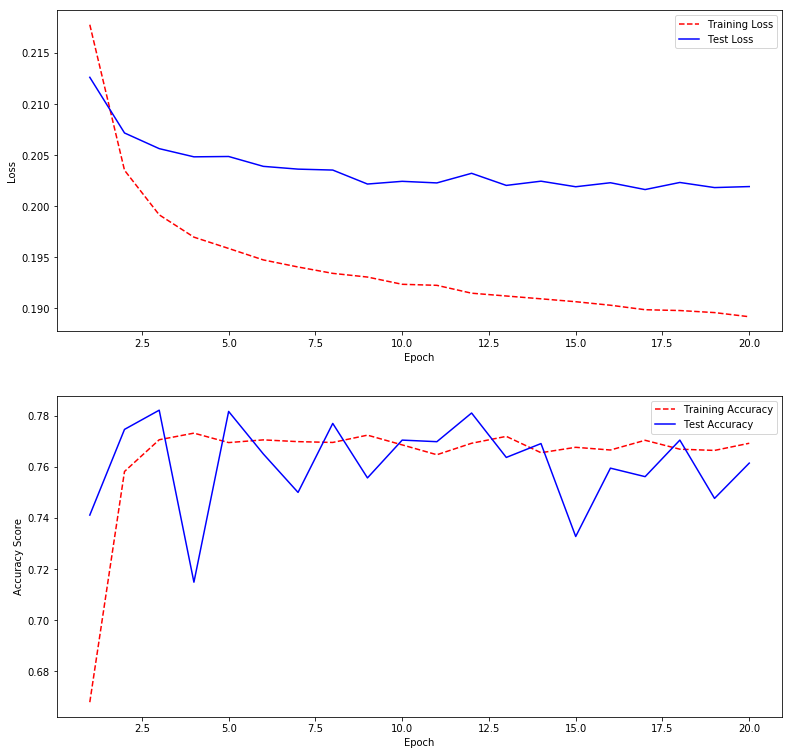

In [186]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(13,13))

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
ax2.plot(epoch_count, training_accuracy, 'r--')
ax2.plot(epoch_count, test_accuracy, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])
ax2.set_ylabel('Accuracy Score')
ax1.set_xlabel('Epoch')

plt.xlabel('Epoch')
plt.show();


# Optimize the model

In [187]:
#Estrarre singolarmente Hidden Layers (codice sui notebook del lab)
#Optimize hyperparameters

import json

#Save the model
# serialize model to JSON
model_json = network.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("model.h5")
print("Saved model to disk")

 


Saved model to disk


# Scoring the new values

In [190]:

#Show some statistics about prediction
from keras.models import model_from_json
import csv
    
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', # Categorical Cross-entropy
                optimizer='adam', 
                metrics=['accuracy'])

#trasform the test data for the evaluation
library = "./"
test_file = "testing_data.csv"
test_data_path = library + "/" + test_file
df_test = pd.read_csv(test_data_path)

print("Dataframe Test shape: " + str(df_test.shape))
print(df_test.head(5))

#use only usefull features and the label
df_test['MARRIAGE'].replace(0, 3, inplace = True)
df_test['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

#Get only the variable that we need (prefilter)
df_test.shape

# Create scaler
scaler = preprocessing.StandardScaler()
scoreset = df_test.as_matrix()

# Transform the feature
scoreset = scaler.fit_transform(scoreset)

# make a prediction
ynew = loaded_model.predict(scoreset)

#Names of all of the features
scoreset_features = list(df_test.columns.values)
scoreset_features.insert(0, "Id")
scoreset_features.append("Prediction")
scoreset_features.append("Score")

result_list = list()

# show the inputs and predicted outputs
for i in range(len(scoreset)):
    if ynew[i][0] >= ynew[i][1]:
        result = 0
        score = ynew[i][0]
    else: 
        result = 1
        score = ynew[i][1]
    
    data_predicted = list(df_test.loc[i,:])
    data_predicted.insert(0,i)
    data_predicted.append(result)
    data_predicted.append(score)
    
    result_list.append(data_predicted)
    
    #print("X= %s\tInput=%s\tPredicted=%s\tScore= %s" % (i,scoreset[i],result,score))
    
df_result = pd.DataFrame(result_list,columns=scoreset_features)

df_result.to_csv("result.csv",sep="|")
print("File result.csv written")



Loaded model from disk
Dataframe Test shape: (3000, 23)
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    1          1         2   33      1      2      2      2   
1    20000.0    2          2         2   35      0      0      2      0   
2   230000.0    2          1         1   44      1     -1     -1     -1   
3   100000.0    1          2         1   42      0      0      0      0   
4   150000.0    1          1         2   29     -2     -2     -2     -2   

   PAY_5    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0      2    ...       19057.0    18453.0    19755.0    19288.0       0.0   
1      0    ...       18600.0    19000.0    19000.0    20000.0    3400.0   
2     -1    ...        2864.0      933.0        0.0        0.0     949.0   
3      0    ...       16138.0    17758.0    18774.0    20272.0    5000.0   
4     -2    ...         831.0     6469.0     5138.0     7810.0    6989.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


File result.csv written
